In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf



In [30]:
df= pd.read_csv('test1.csv')

In [31]:
df

Date Time    CPRAVG       PROP       BUT   ETHYLENE  \
0      01.01.2009 00:10:00  0.428151  18.960609  3.973630  29.732470   
1      01.01.2009 00:20:00  0.427783  18.960360  3.973562  30.123590   
2      01.01.2009 00:30:00  0.427432  19.009649  4.181924  30.477831   
3      01.01.2009 00:40:00  0.427082  19.155710  3.950392  30.425819   
4      01.01.2009 00:50:00  0.426732  19.334640  3.689848  30.546061   
...                    ...       ...        ...       ...        ...   
12463  28.03.2009 13:20:00  0.516947  22.566521  4.234831  33.299759   
12464  28.03.2009 13:30:00  0.516790  23.644880  4.081517  33.329700   
12465  28.03.2009 13:40:00  0.516591  23.736650  4.371761  33.339199   
12466  28.03.2009 13:50:00  0.516339  23.319229  4.153561  33.173019   
12467  28.03.2009 14:00:00  0.515635  22.664320  4.087688  33.117519   

       AI12201M          FLW         COT        TEMP     PRESS        O2  \
0      0.014431  30711.65039  820.118210  632.399261  0.466357  1.444160   
1      0.014822  30700.66016  819.662811  633.057602  0.475288  1.413894   
2      0.012689  30689.66016  819.886444  631.841385  0.464559  1.515123   
3      0.012580  30678.66016  819.660171  632.495224  0.471809  1.404055   
4      0.012472  30667.66016  819.646805  632.388214  0.470504  1.191485   
...         ...          ...         ...         ...       ...       ...   
12463  0.012168  28546.11914  853.335480  653.310226  0.490392  0.977542   
12464  0.011981  28570.01953  853.114197  652.723724  0.485867  0.982836   
12465  0.011793  28593.91992  853.182159  653.046051  0.486376  0.988131   
12466  0.011606  28617.82031  853.211716  653.374191  0.489971  0.993426   
12467  0.011419  28641.72070  852.540192  653.383255  0.492127  0.992925   

          DRAFT        ETH  
0     -5.616851  75.809700  
1     -5.540349  75.810066  
2     -5.628389  75.552841  
3     -5.576591  75.580223  
4     -5.274679  75.638023  
...         ...        ...  
12463 -4.964487  72.158081  
12464 -4.957215  71.223877  
12465 -4.961114  70.807220  
12466 -4.955902  71.450020  
12467 -4.967060  72.160553  

[12468 rows x 13 columns]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12468 entries, 0 to 12467
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date Time  12468 non-null  object 
 1   CPRAVG     12468 non-null  float64
 2   PROP       12468 non-null  float64
 3   BUT        12468 non-null  float64
 4   ETHYLENE   12468 non-null  float64
 5   AI12201M   12468 non-null  float64
 6   FLW        12468 non-null  float64
 7   COT        12468 non-null  float64
 8   TEMP       12468 non-null  float64
 9   PRESS      12468 non-null  float64
 10  O2         12468 non-null  float64
 11  DRAFT      12468 non-null  float64
 12  ETH        12468 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.2+ MB


In [33]:
df.describe()

CPRAVG          PROP           BUT      ETHYLENE      AI12201M  \
count  12468.000000  12468.000000  12468.000000  12468.000000  12468.000000   
mean       0.495450     20.162440      3.958684     34.248126      0.013142   
std        0.018479      2.430416      0.563155      1.836836      0.012578   
min        0.424473     14.875050      1.019250      9.619049     -0.000254   
25%        0.483243     18.405780      3.599273     33.454014      0.011875   
50%        0.501135     19.899370      3.895666     34.707460      0.012548   
75%        0.508722     21.987142      4.242697     34.955860      0.013396   
max        0.519575     25.329201      5.131488     40.738709      0.308063   

                FLW           COT          TEMP         PRESS            O2  \
count  12468.000000  12468.000000  12468.000000  12468.000000  12468.000000   
mean   28311.593644    851.718373    656.320764      0.488566      1.390389   
std      941.068536      2.778033      4.434483      0.009128      0.455913   
min    25785.710940    819.507965    630.945389      0.394584     -0.007892   
25%    27674.915037    851.510098    653.850819      0.484203      1.190500   
50%    28089.160155    851.881050    657.002174      0.489644      1.492307   
75%    28520.658202    852.756031    659.290020      0.493949      1.672698   
max    32722.849610    858.740418    674.985657      0.558050     20.294241   

              DRAFT           ETH  
count  12468.000000  12468.000000  
mean      -4.585419     74.292284  
std        0.321607      3.144626  
min       -5.780606     64.836357  
25%       -4.908043     72.239115  
50%       -4.500075     74.875546  
75%       -4.393241     76.466673  
max       -3.127114     80.513519

In [36]:
df['date']= pd.to_datetime(df['Date Time'], infer_datetime_format=True)

In [37]:
df.set_index('date')

Date Time    CPRAVG       PROP       BUT  \
date                                                                      
2009-01-01 00:10:00  01.01.2009 00:10:00  0.428151  18.960609  3.973630   
2009-01-01 00:20:00  01.01.2009 00:20:00  0.427783  18.960360  3.973562   
2009-01-01 00:30:00  01.01.2009 00:30:00  0.427432  19.009649  4.181924   
2009-01-01 00:40:00  01.01.2009 00:40:00  0.427082  19.155710  3.950392   
2009-01-01 00:50:00  01.01.2009 00:50:00  0.426732  19.334640  3.689848   
...                                  ...       ...        ...       ...   
2009-03-28 13:20:00  28.03.2009 13:20:00  0.516947  22.566521  4.234831   
2009-03-28 13:30:00  28.03.2009 13:30:00  0.516790  23.644880  4.081517   
2009-03-28 13:40:00  28.03.2009 13:40:00  0.516591  23.736650  4.371761   
2009-03-28 13:50:00  28.03.2009 13:50:00  0.516339  23.319229  4.153561   
2009-03-28 14:00:00  28.03.2009 14:00:00  0.515635  22.664320  4.087688   

                      ETHYLENE  AI12201M          FLW         COT        TEMP  \
date                                                                            
2009-01-01 00:10:00  29.732470  0.014431  30711.65039  820.118210  632.399261   
2009-01-01 00:20:00  30.123590  0.014822  30700.66016  819.662811  633.057602   
2009-01-01 00:30:00  30.477831  0.012689  30689.66016  819.886444  631.841385   
2009-01-01 00:40:00  30.425819  0.012580  30678.66016  819.660171  632.495224   
2009-01-01 00:50:00  30.546061  0.012472  30667.66016  819.646805  632.388214   
...                        ...       ...          ...         ...         ...   
2009-03-28 13:20:00  33.299759  0.012168  28546.11914  853.335480  653.310226   
2009-03-28 13:30:00  33.329700  0.011981  28570.01953  853.114197  652.723724   
2009-03-28 13:40:00  33.339199  0.011793  28593.91992  853.182159  653.046051   
2009-03-28 13:50:00  33.173019  0.011606  28617.82031  853.211716  653.374191   
2009-03-28 14:00:00  33.117519  0.011419  28641.72070  852.540192  653.383255   

                        PRESS        O2     DRAFT        ETH  
date                                                          
2009-01-01 00:10:00  0.466357  1.444160 -5.616851  75.809700  
2009-01-01 00:20:00  0.475288  1.413894 -5.540349  75.810066  
2009-01-01 00:30:00  0.464559  1.515123 -5.628389  75.552841  
2009-01-01 00:40:00  0.471809  1.404055 -5.576591  75.580223  
2009-01-01 00:50:00  0.470504  1.191485 -5.274679  75.638023  
...                       ...       ...       ...        ...  
2009-03-28 13:20:00  0.490392  0.977542 -4.964487  72.158081  
2009-03-28 13:30:00  0.485867  0.982836 -4.957215  71.223877  
2009-03-28 13:40:00  0.486376  0.988131 -4.961114  70.807220  
2009-03-28 13:50:00  0.489971  0.993426 -4.955902  71.450020  
2009-03-28 14:00:00  0.492127  0.992925 -4.967060  72.160553  

[12468 rows x 13 columns]

In [38]:
df_input=df[['CPRAVG','PROP','BUT','ETHYLENE','AI12201M','FLW','COT','TEMP','PRESS','O2','DRAFT','ETH']]

In [39]:
df_input

CPRAVG       PROP       BUT   ETHYLENE  AI12201M          FLW  \
0      0.428151  18.960609  3.973630  29.732470  0.014431  30711.65039   
1      0.427783  18.960360  3.973562  30.123590  0.014822  30700.66016   
2      0.427432  19.009649  4.181924  30.477831  0.012689  30689.66016   
3      0.427082  19.155710  3.950392  30.425819  0.012580  30678.66016   
4      0.426732  19.334640  3.689848  30.546061  0.012472  30667.66016   
...         ...        ...       ...        ...       ...          ...   
12463  0.516947  22.566521  4.234831  33.299759  0.012168  28546.11914   
12464  0.516790  23.644880  4.081517  33.329700  0.011981  28570.01953   
12465  0.516591  23.736650  4.371761  33.339199  0.011793  28593.91992   
12466  0.516339  23.319229  4.153561  33.173019  0.011606  28617.82031   
12467  0.515635  22.664320  4.087688  33.117519  0.011419  28641.72070   

              COT        TEMP     PRESS        O2     DRAFT        ETH  
0      820.118210  632.399261  0.466357  1.444160 -5.616851  75.809700  
1      819.662811  633.057602  0.475288  1.413894 -5.540349  75.810066  
2      819.886444  631.841385  0.464559  1.515123 -5.628389  75.552841  
3      819.660171  632.495224  0.471809  1.404055 -5.576591  75.580223  
4      819.646805  632.388214  0.470504  1.191485 -5.274679  75.638023  
...           ...         ...       ...       ...       ...        ...  
12463  853.335480  653.310226  0.490392  0.977542 -4.964487  72.158081  
12464  853.114197  652.723724  0.485867  0.982836 -4.957215  71.223877  
12465  853.182159  653.046051  0.486376  0.988131 -4.961114  70.807220  
12466  853.211716  653.374191  0.489971  0.993426 -4.955902  71.450020  
12467  852.540192  653.383255  0.492127  0.992925 -4.967060  72.160553  

[12468 rows x 12 columns]

In [40]:
scaler= MinMaxScaler(feature_range=(0,1))
data_scaled= scaler.fit_transform(df_input)

In [41]:
data_scaled

array([[0.03867961, 0.39080742, 0.71843606, ..., 0.07152214, 0.061713  ,
        0.69995722],
       [0.03480348, 0.39078352, 0.71841953, ..., 0.07003136, 0.09054363,
        0.69998058],
       [0.03111903, 0.39549837, 0.76908826, ..., 0.07501749, 0.05736476,
        0.68357295],
       ...,
       [0.96862388, 0.84766336, 0.81525217, ..., 0.04906003, 0.30883528,
        0.38086379],
       [0.9659712 , 0.80773459, 0.7621911 , ..., 0.04932083, 0.31079942,
        0.42186607],
       [0.95857125, 0.74508875, 0.7461723 , ..., 0.04929615, 0.3065944 ,
        0.46718888]])

In [42]:
features=data_scaled
target=data_scaled[:,0]

In [43]:
TimeseriesGenerator(features,target,length=1,sampling_rate=1,batch_size=1)[0]

(array([[[0.03867961, 0.39080742, 0.71843606, 0.64632521, 0.04763025,
          0.71008231, 0.01555459, 0.03301235, 0.43906771, 0.07152214,
          0.061713  , 0.69995722]]]),
 array([0.03480348]))

In [44]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=123,shuffle=False)

In [45]:
x_train.shape

(8727, 12)

In [46]:
x_test.shape

(3741, 12)

In [47]:
y_test.shape

(3741,)

In [48]:
win_length=60
batch_size=32
num_features=12
train_generator=TimeseriesGenerator(x_train,y_train,length=win_length,sampling_rate=1,batch_size=batch_size)
test_generator=TimeseriesGenerator(x_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)



In [49]:
train_generator[0]

(array([[[0.03867961, 0.39080742, 0.71843606, ..., 0.07152214,
          0.061713  , 0.69995722],
         [0.03480348, 0.39078352, 0.71841953, ..., 0.07003136,
          0.09054363, 0.69998058],
         [0.03111903, 0.39549837, 0.76908826, ..., 0.07501749,
          0.05736476, 0.68357295],
         ...,
         [0.0930564 , 0.2695723 , 0.6572516 , ..., 0.03465017,
          0.55627635, 0.80926516],
         [0.09484929, 0.26733985, 0.66727828, ..., 0.03525546,
          0.54708209, 0.80846607],
         [0.09848615, 0.2756504 , 0.68594888, ..., 0.03778282,
          0.5388221 , 0.79659262]],
 
        [[0.03480348, 0.39078352, 0.71841953, ..., 0.07003136,
          0.09054363, 0.69998058],
         [0.03111903, 0.39549837, 0.76908826, ..., 0.07501749,
          0.05736476, 0.68357295],
         [0.02743473, 0.40946994, 0.71278513, ..., 0.06954673,
          0.0768854 , 0.68531957],
         ...,
         [0.09484929, 0.26733985, 0.66727828, ..., 0.03525546,
          0.54708209, 0.

In [71]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import tensorflow as tf


model= tf.keras.Sequential()
model.add(LSTM(64, input_shape=(win_length, num_features),return_sequences=True))
model.add(tf.keras.layers.Activation('relu'))
model.add(LSTM(32,return_sequences=False))   
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))


In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 60, 64)            19712     
_________________________________________________________________
activation_2 (Activation)    (None, 60, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
activation_3 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 32,161
Trainable params: 32,161
Non-trainable params: 0
__________________________________________________

In [92]:

model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(),metrics=[tf.metrics.MeanAbsoluteError()])
history=model.fit(train_generator,epochs=100,validation_data=test_generator,shuffle=False)


Epoch 1/100
271/271 [==============================] - 10s 23ms/step - loss: 0.0026 - mean_absolute_error: 0.0321 - val_loss: 6.7431e-04 - val_mean_absolute_error: 0.0202
Epoch 2/100
271/271 [==============================] - 6s 22ms/step - loss: 0.0020 - mean_absolute_error: 0.0288 - val_loss: 7.3219e-04 - val_mean_absolute_error: 0.0214
Epoch 3/100
271/271 [==============================] - 6s 23ms/step - loss: 0.0022 - mean_absolute_error: 0.0302 - val_loss: 6.6426e-04 - val_mean_absolute_error: 0.0201
Epoch 4/100
271/271 [==============================] - 7s 25ms/step - loss: 0.0025 - mean_absolute_error: 0.0308 - val_loss: 0.0010 - val_mean_absolute_error: 0.0264
Epoch 5/100
271/271 [==============================] - 7s 25ms/step - loss: 0.0022 - mean_absolute_error: 0.0299 - val_loss: 4.6505e-04 - val_mean_absolute_error: 0.0167
Epoch 6/100
271/271 [==============================] - 6s 21ms/step - loss: 0.0023 - mean_absolute_error: 0.0299 - val_loss: 5.7819e-04 - val_mean_absolu

271/271 [==============================] - 6s 21ms/step - loss: 0.0024 - mean_absolute_error: 0.0306 - val_loss: 6.1103e-04 - val_mean_absolute_error: 0.0200
Epoch 50/100
271/271 [==============================] - 6s 21ms/step - loss: 0.0023 - mean_absolute_error: 0.0295 - val_loss: 4.3964e-04 - val_mean_absolute_error: 0.0162
Epoch 51/100
271/271 [==============================] - 6s 21ms/step - loss: 0.0026 - mean_absolute_error: 0.0319 - val_loss: 6.1884e-04 - val_mean_absolute_error: 0.0206
Epoch 52/100
271/271 [==============================] - 6s 21ms/step - loss: 0.0022 - mean_absolute_error: 0.0277 - val_loss: 4.8854e-04 - val_mean_absolute_error: 0.0174
Epoch 53/100
271/271 [==============================] - 6s 21ms/step - loss: 0.0022 - mean_absolute_error: 0.0300 - val_loss: 3.9117e-04 - val_mean_absolute_error: 0.0155
Epoch 54/100
271/271 [==============================] - 6s 21ms/step - loss: 0.0022 - mean_absolute_error: 0.0294 - val_loss: 3.8292e-04 - val_mean_absolute_e

Epoch 97/100
271/271 [==============================] - 7s 24ms/step - loss: 0.0024 - mean_absolute_error: 0.0296 - val_loss: 7.2551e-04 - val_mean_absolute_error: 0.0239
Epoch 98/100
271/271 [==============================] - 7s 25ms/step - loss: 0.0022 - mean_absolute_error: 0.0311 - val_loss: 4.7142e-04 - val_mean_absolute_error: 0.0187
Epoch 99/100
271/271 [==============================] - 6s 21ms/step - loss: 0.0024 - mean_absolute_error: 0.0297 - val_loss: 2.7512e-04 - val_mean_absolute_error: 0.0134
Epoch 100/100
271/271 [==============================] - 6s 23ms/step - loss: 0.0025 - mean_absolute_error: 0.0313 - val_loss: 1.2565e-04 - val_mean_absolute_error: 0.0095


In [94]:
model.evaluate(test_generator,verbose=0)

[0.00012565331417135894, 0.009464293718338013]

In [95]:
predictions=model.predict(test_generator)

In [96]:
predictions.shape[0]

3681

In [97]:
predictions

array([[0.88807005],
       [0.8866953 ],
       [0.8873091 ],
       ...,
       [0.9552684 ],
       [0.9516393 ],
       [0.9522966 ]], dtype=float32)

In [98]:
x_test[:,1:][win_length:]

array([[0.3555114 , 0.64085715, 0.71810268, ..., 0.07434155, 0.51927306,
        0.76609872],
       [0.30689442, 0.59913145, 0.72225954, ..., 0.07556186, 0.52066144,
        0.80845245],
       [0.33264398, 0.61165355, 0.721666  , ..., 0.07633099, 0.51429011,
        0.7907143 ],
       ...,
       [0.84766336, 0.81525217, 0.76222396, ..., 0.04906003, 0.30883528,
        0.38086379],
       [0.80773459, 0.7621911 , 0.75688394, ..., 0.04932083, 0.31079942,
        0.42186607],
       [0.74508875, 0.7461723 , 0.7551005 , ..., 0.04929615, 0.3065944 ,
        0.46718888]])

In [99]:
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [100]:
rev_trans=scaler.inverse_transform(df_pred)

In [101]:
rev_trans

array([[ 0.50892997, 18.59161949,  3.65460706, ...,  1.50139999,
        -4.40271902, 76.84661102],
       [ 0.50879923, 18.08337021,  3.48302102, ...,  1.52617502,
        -4.39903498, 77.51059723],
       [ 0.5088576 , 18.35256004,  3.5345149 , ...,  1.54179001,
        -4.41594124, 77.23251343],
       ...,
       [ 0.51532064, 23.73665047,  4.37176084, ...,  0.98813129,
        -4.96111393, 70.80722046],
       [ 0.51497551, 23.31922913,  4.15356111, ...,  0.99342608,
        -4.9559021 , 71.45001984],
       [ 0.51503802, 22.66431999,  4.08768797, ...,  0.99292493,
        -4.96706009, 72.16055298]])

In [102]:
df_final=df_input[predictions.shape[0]*-1:]

In [103]:
df_final.count()

CPRAVG      3681
PROP        3681
BUT         3681
ETHYLENE    3681
AI12201M    3681
FLW         3681
COT         3681
TEMP        3681
PRESS       3681
O2          3681
DRAFT       3681
ETH         3681
dtype: int64

In [104]:
df_final['predicted']=rev_trans[:,0]

<ipython-input-104-c22a204895a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['predicted']=rev_trans[:,0]


In [105]:
pd.set_option('display.max_rows', df_final.shape[0])
df_final

CPRAVG       PROP       BUT   ETHYLENE  AI12201M          FLW  \
8787   0.508302  18.591619  3.654607  31.966160  0.012801  28368.55078   
8788   0.508365  18.083370  3.483021  32.095520  0.012775  28362.14063   
8789   0.508502  18.352560  3.534515  32.077049  0.012749  28355.72070   
8790   0.508590  18.144360  3.511890  32.106789  0.012724  28349.31055   
8791   0.508556  18.059401  3.474828  32.122540  0.012698  28342.90039   
8792   0.508527  18.150150  3.561968  32.139370  0.012672  28336.48047   
8793   0.508479  18.088341  3.554143  32.167480  0.012647  28330.07031   
8794   0.508418  18.269739  3.621533  32.175461  0.012621  28323.65039   
8795   0.508700  18.206181  3.482263  32.138481  0.012596  28317.24023   
8796   0.508798  18.198610  3.542900  32.121769  0.012570  28310.83008   
8797   0.508758  18.472019  3.476062  32.149109  0.012544  28307.16992   
8798   0.508718  18.198351  3.640483  32.124741  0.012519  28307.97070   
8799   0.508681  18.327299  3.418972  32.109180  0.012493  28308.83008   
8800   0.508648  18.350019  3.597544  32.124779  0.012467  28309.69922   
8801   0.508523  18.417440  3.494266  32.124729  0.012442  28310.56055   
8802   0.508218  18.489941  3.512628  32.098289  0.012416  28311.41992   
8803   0.507910  18.548929  3.518402  32.051140  0.012390  28312.28906   
8804   0.507745  18.449421  3.552604  32.103909  0.012365  28313.15039   
8805   0.507863  18.718361  3.512971  32.140148  0.012339  28314.00977   
8806   0.507793  18.661501  3.516033  32.126049  0.012314  28314.88086   
8807   0.507841  19.781790  3.587567  32.063030  0.012288  28315.74023   
8808   0.508019  20.338499  3.645649  31.970640  0.012262  28316.59961   
8809   0.507884  20.082100  3.577185  31.925779  0.012237  28317.46094   
8810   0.507427  20.259689  4.317214  31.958210  0.012218  28318.33008   
8811   0.507500  20.198759  3.836548  31.960911  0.012230  28319.18945   
8812   0.507572  20.180410  3.960726  31.949921  0.012247  28320.05078   
8813   0.507645  20.136560  3.835469  31.896799  0.012263  28320.91992   
8814   0.507712  20.041170  4.001475  31.965240  0.012280  28321.77930   
8815   0.507689  19.940100  3.917949  31.908230  0.012297  28322.64063   
8816   0.507632  19.973921  3.931755  31.939461  0.012314  28323.50000   
8817   0.507573  19.584530  3.834616  31.960819  0.012330  28324.36914   
8818   0.507514  18.550270  3.932054  32.033581  0.012347  28325.23047   
8819   0.507452  18.487000  3.891491  32.094070  0.012364  28326.08984   
8820   0.507409  18.723129  3.669641  32.092041  0.012380  28326.96094   
8821   0.507329  18.635160  3.704671  32.084679  0.012397  28326.49023   
8822   0.507221  18.706869  3.687515  32.143669  0.012414  28323.88086   
8823   0.507292  18.776260  3.988635  32.129620  0.012430  28321.24023   
8824   0.507016  18.724070  3.788146  32.118111  0.012447  28318.58984   
8825   0.507091  19.578300  4.008101  32.048359  0.012464  28315.94922   
8826   0.507285  20.107491  3.904090  31.881269  0.012480  28313.31055   
8827   0.507489  19.416080  3.849931  31.894550  0.012497  28310.66992   
8828   0.507259  18.741159  3.734957  31.992680  0.012514  28308.02930   
8829   0.507095  18.604980  3.719160  32.092361  0.012530  28305.38086   
8830   0.506980  18.255289  3.879824  32.081600  0.012547  28302.74023   
8831   0.507434  18.321659  3.640258  32.161201  0.012564  28300.09961   
8832   0.507502  18.715090  3.742130  32.170818  0.012581  28297.46094   
8833   0.507659  19.410400  3.622903  32.105041  0.012597  28294.82031   
8834   0.507403  19.662161  3.584048  32.110352  0.012605  28292.17969   
8835   0.507227  19.861740  3.331779  32.072449  0.012571  28289.52930   
8836   0.507330  19.404989  3.465350  32.055641  0.012531  28286.89063   
8837   0.507467  19.423201  3.572341  32.079800  0.012491  28284.25000   
8838   0.507401  19.513210  3.691528  32.059700  0.012451  28281.60938   
8839   0.507206  20.228100  3.803869  31.975590  0.012411  28278.96094   
8840   0.5071

In [106]:
pd.set_option('display.max_rows', df_final.shape[0])

df_final

CPRAVG       PROP       BUT   ETHYLENE  AI12201M          FLW  \
8787   0.508302  18.591619  3.654607  31.966160  0.012801  28368.55078   
8788   0.508365  18.083370  3.483021  32.095520  0.012775  28362.14063   
8789   0.508502  18.352560  3.534515  32.077049  0.012749  28355.72070   
8790   0.508590  18.144360  3.511890  32.106789  0.012724  28349.31055   
8791   0.508556  18.059401  3.474828  32.122540  0.012698  28342.90039   
8792   0.508527  18.150150  3.561968  32.139370  0.012672  28336.48047   
8793   0.508479  18.088341  3.554143  32.167480  0.012647  28330.07031   
8794   0.508418  18.269739  3.621533  32.175461  0.012621  28323.65039   
8795   0.508700  18.206181  3.482263  32.138481  0.012596  28317.24023   
8796   0.508798  18.198610  3.542900  32.121769  0.012570  28310.83008   
8797   0.508758  18.472019  3.476062  32.149109  0.012544  28307.16992   
8798   0.508718  18.198351  3.640483  32.124741  0.012519  28307.97070   
8799   0.508681  18.327299  3.418972  32.109180  0.012493  28308.83008   
8800   0.508648  18.350019  3.597544  32.124779  0.012467  28309.69922   
8801   0.508523  18.417440  3.494266  32.124729  0.012442  28310.56055   
8802   0.508218  18.489941  3.512628  32.098289  0.012416  28311.41992   
8803   0.507910  18.548929  3.518402  32.051140  0.012390  28312.28906   
8804   0.507745  18.449421  3.552604  32.103909  0.012365  28313.15039   
8805   0.507863  18.718361  3.512971  32.140148  0.012339  28314.00977   
8806   0.507793  18.661501  3.516033  32.126049  0.012314  28314.88086   
8807   0.507841  19.781790  3.587567  32.063030  0.012288  28315.74023   
8808   0.508019  20.338499  3.645649  31.970640  0.012262  28316.59961   
8809   0.507884  20.082100  3.577185  31.925779  0.012237  28317.46094   
8810   0.507427  20.259689  4.317214  31.958210  0.012218  28318.33008   
8811   0.507500  20.198759  3.836548  31.960911  0.012230  28319.18945   
8812   0.507572  20.180410  3.960726  31.949921  0.012247  28320.05078   
8813   0.507645  20.136560  3.835469  31.896799  0.012263  28320.91992   
8814   0.507712  20.041170  4.001475  31.965240  0.012280  28321.77930   
8815   0.507689  19.940100  3.917949  31.908230  0.012297  28322.64063   
8816   0.507632  19.973921  3.931755  31.939461  0.012314  28323.50000   
8817   0.507573  19.584530  3.834616  31.960819  0.012330  28324.36914   
8818   0.507514  18.550270  3.932054  32.033581  0.012347  28325.23047   
8819   0.507452  18.487000  3.891491  32.094070  0.012364  28326.08984   
8820   0.507409  18.723129  3.669641  32.092041  0.012380  28326.96094   
8821   0.507329  18.635160  3.704671  32.084679  0.012397  28326.49023   
8822   0.507221  18.706869  3.687515  32.143669  0.012414  28323.88086   
8823   0.507292  18.776260  3.988635  32.129620  0.012430  28321.24023   
8824   0.507016  18.724070  3.788146  32.118111  0.012447  28318.58984   
8825   0.507091  19.578300  4.008101  32.048359  0.012464  28315.94922   
8826   0.507285  20.107491  3.904090  31.881269  0.012480  28313.31055   
8827   0.507489  19.416080  3.849931  31.894550  0.012497  28310.66992   
8828   0.507259  18.741159  3.734957  31.992680  0.012514  28308.02930   
8829   0.507095  18.604980  3.719160  32.092361  0.012530  28305.38086   
8830   0.506980  18.255289  3.879824  32.081600  0.012547  28302.74023   
8831   0.507434  18.321659  3.640258  32.161201  0.012564  28300.09961   
8832   0.507502  18.715090  3.742130  32.170818  0.012581  28297.46094   
8833   0.507659  19.410400  3.622903  32.105041  0.012597  28294.82031   
8834   0.507403  19.662161  3.584048  32.110352  0.012605  28292.17969   
8835   0.507227  19.861740  3.331779  32.072449  0.012571  28289.52930   
8836   0.507330  19.404989  3.465350  32.055641  0.012531  28286.89063   
8837   0.507467  19.423201  3.572341  32.079800  0.012491  28284.25000   
8838   0.507401  19.513210  3.691528  32.059700  0.012451  28281.60938   
8839   0.507206  20.228100  3.803869  31.975590  0.012411  28278.96094   
8840   0.5071

<AxesSubplot:>

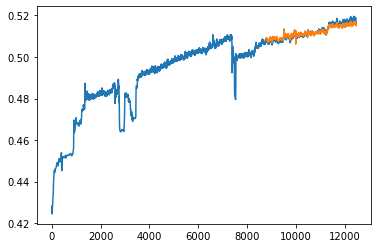

In [108]:

df_input['CPRAVG'].plot()
df_final['predicted'].plot()